In [2]:
%pip install mat73
%pip install openexr
%pip install spectral

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nelso\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np 
import OpenEXR

def depth_exr_to_numpy(exr_path,
                       typemap={"HALF": np.float16, "FLOAT": np.float32}):
    """
    """
    print("[processing {}]".format(exr_path))
    # load EXR and extract shape
    exr = OpenEXR.InputFile(exr_path)
    print(exr.header())
    dw = exr.header()["dataWindow"]
    shape = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    #
    arr_maps = {}
    wv = []
    for ch_name, ch in exr.header()["channels"].items():
        print("reading channel", ch_name)
        wv.append(ch_name)
        # This, and __str__ seem to be the only ways to get typename
        exr_typename = ch.type.names[ch.type.v]
        np_type = typemap[exr_typename]
        # convert channel to np array
        bytestring = exr.channel(ch_name, ch.type)
        arr = np.frombuffer(bytestring, dtype=np_type).reshape(shape)
        arr_maps[ch_name] = arr

    return arr_maps, wv[3:]

arr_maps,wv = depth_exr_to_numpy("scene30_reflectanc.exr")

[processing scene30_reflectanc.exr]
{'channels': {'B': HALF (1, 1), 'G': HALF (1, 1), 'R': HALF (1, 1), 'w420nm': HALF (1, 1), 'w430nm': HALF (1, 1), 'w440nm': HALF (1, 1), 'w450nm': HALF (1, 1), 'w460nm': HALF (1, 1), 'w470nm': HALF (1, 1), 'w480nm': HALF (1, 1), 'w490nm': HALF (1, 1), 'w500nm': HALF (1, 1), 'w510nm': HALF (1, 1), 'w520nm': HALF (1, 1), 'w530nm': HALF (1, 1), 'w540nm': HALF (1, 1), 'w550nm': HALF (1, 1), 'w560nm': HALF (1, 1), 'w570nm': HALF (1, 1), 'w580nm': HALF (1, 1), 'w590nm': HALF (1, 1), 'w600nm': HALF (1, 1), 'w610nm': HALF (1, 1), 'w620nm': HALF (1, 1), 'w630nm': HALF (1, 1), 'w640nm': HALF (1, 1), 'w650nm': HALF (1, 1), 'w660nm': HALF (1, 1), 'w670nm': HALF (1, 1), 'w680nm': HALF (1, 1), 'w690nm': HALF (1, 1), 'w700nm': HALF (1, 1), 'w710nm': HALF (1, 1), 'w720nm': HALF (1, 1)}, 'compression': ZIP_COMPRESSION, 'dataWindow': (0, 0) - (3375, 2703), 'displayWindow': (0, 0) - (3375, 2703), 'lineOrder': INCREASING_Y, 'pixelAspectRatio': 1.0, 'screenWindowCenter':

KeyboardInterrupt: 

In [34]:
arr_maps.keys()

dict_keys(['B', 'G', 'R', 'w420nm', 'w430nm', 'w440nm', 'w450nm', 'w460nm', 'w470nm', 'w480nm', 'w490nm', 'w500nm', 'w510nm', 'w520nm', 'w530nm', 'w540nm', 'w550nm', 'w560nm', 'w570nm', 'w580nm', 'w590nm', 'w600nm', 'w610nm', 'w620nm', 'w630nm', 'w640nm', 'w650nm', 'w660nm', 'w670nm', 'w680nm', 'w690nm', 'w700nm', 'w710nm', 'w720nm'])

In [45]:
def dict_to_matrix(spectral_dict):

    height = list(spectral_dict.values())[0].shape[0]
    width = list(spectral_dict.values())[0].shape[1]

    matrix = np.zeros((height, width , len(spectral_dict)-3))

    for i,key in enumerate( list(spectral_dict.keys())[3:] ):
        matrix[:,:,i] = spectral_dict[key]

    return matrix

cube = dict_to_matrix(arr_maps)      

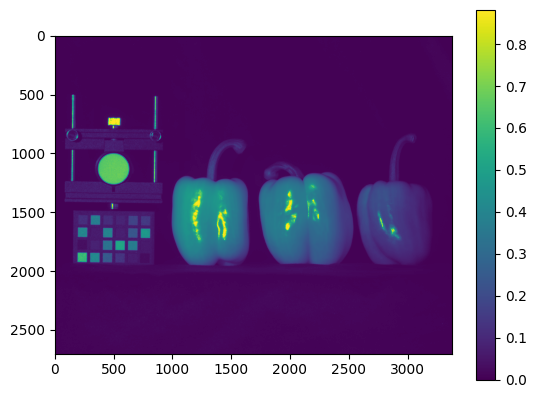

In [82]:
plt.imshow(cube[:,:,20])
plt.colorbar()

In [ ]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

import cv2
img = cv2.imread("scene30_reflectanc.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)


In [2]:
import mat73
data_dict = mat73.loadmat('Img_100.mat')

cube = data_dict['cube']
cube = cube.transpose(1, 0, 2)

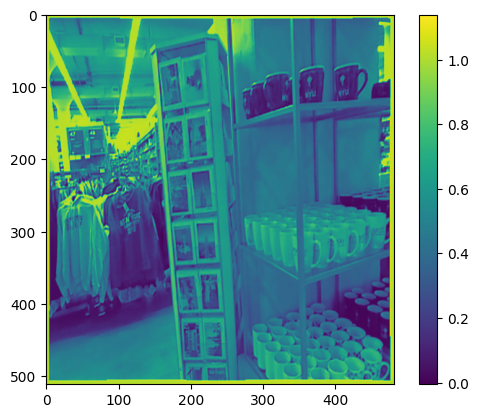

In [3]:
import matplotlib.pyplot as plt

plt.imshow(cube[:,:,10])
plt.colorbar()

In [4]:
import pandas
import numpy as np

spectraldb = pandas.read_csv('spectraldb.csv')
spectraldb.columns

Index(['ID', 'Name', 'ObjectType', 'RadianceType', 'MeasurementLocation',
       'Lat', 'Long', 'MeasurementCredit', 'URL', 'Comments', 'Specularity',
       'Roughness', 'MeasurementType', 'R', 'G', 'B', 'L', 'a', 'b', 'hex',
       'SCIMeasures', 'SCEMeasures', 'VisibleReflectance',
       'MelanopicReflectance', 'Radiance Material'],
      dtype='object')

In [12]:
import re

wv_int = [int(num) for item in wv for num in re.findall(r'\d+', item)]

TypeError: expected string or bytes-like object

In [13]:
wv_int = list(range(420,730,10))

In [ ]:
720

KeyError: Furniture
KeyError: Exterior Building
KeyError: Plant
KeyError: Exterior Floor
KeyError: Exterior Floor
KeyError: Exterior
KeyError: Exterior
KeyError: Exterior
KeyError: Exterior
KeyError: Exterior Floor
KeyError: Exterior Floor
KeyError: Exterior
KeyError: Exterior Floor
KeyError: Exterior
KeyError: Exterior
KeyError: Exterior Floor
KeyError: Others
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color Swatch
KeyError: Color

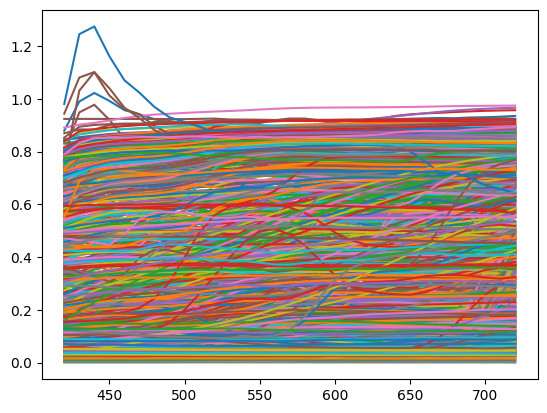

In [15]:
data = []
objects = {}

for row in spectraldb.itertuples():
    SCEdict = eval(row.SCEMeasures)
    wavelengths = wv_int
    try:
        reflectances = np.array([SCEdict[wavelength] for wavelength in wv_int]) / 100
    except KeyError:
        print(f"KeyError: {row.ObjectType}")
        continue
    if row.ObjectType not in objects.keys():
        objects[row.ObjectType] = len(objects)
    data.append(reflectances[:31])
    plt.plot(wavelengths, reflectances)

In [16]:
objects

{'Wall': 0,
 'Floor': 1,
 'Ceiling': 2,
 'Door': 3,
 'Furniture': 4,
 'Exterior Floor': 5,
 'Others': 6,
 'Exterior Building': 7,
 'Window Mullion': 8,
 'PV': 9,
 'Color Swatch': 10,
 'Plant': 11,
 'Exterior': 12}

In [17]:
materials_matrix = np.array(data)
materials_matrix.shape

(917, 31)

In [84]:
def search_in_spectraldb(refct_pixel, spectraldb_matrix):
    """
    Search for a reference pixel in the spectral database with the l2 norm

    Parameters
    ----------
    refct_pixel : np.array of shape (n_channels,)
    spectraldb_matrix : np.array of shape (n_materials, n_channels)

    Returns
    -------
    np.array of shape (n_materials,)
        The material index with the minimum l2 norm
    """
    #print(np.linalg.norm(refct_pixel - spectraldb_matrix,2, axis=1).shape)
    return np.argmin(np.linalg.norm(refct_pixel - spectraldb_matrix,2, axis=1))


In [117]:
np.linalg.norm([[1,2,5],[1,2,3]],2,axis=1)

array([5.47722558, 3.74165739])

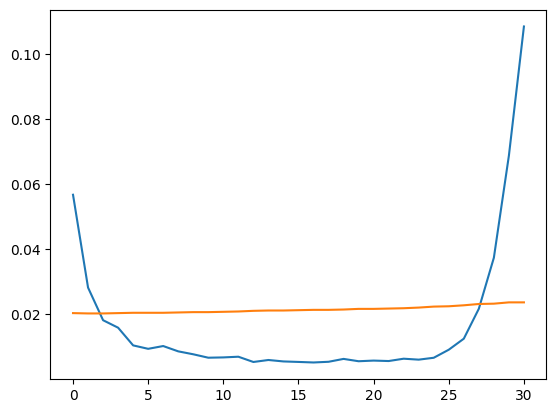

In [127]:
segmentation = np.zeros((cube.shape[0], cube.shape[1]), dtype=np.uint32)

for i in range(cube.shape[0]):
    for j in range(cube.shape[1]):
        refct_pixel = cube[150,50,:]
        material = search_in_spectraldb(refct_pixel, materials_matrix)
        row = spectraldb.iloc[material, :]
        plt.plot(refct_pixel)
        #print((np.array(list(eval(row.SCEMeasures).values())) / 100).shape)
        #plt.plot((np.array(list(eval(row.SCEMeasures).values())) / 100)[:31])
        plt.plot(materials_matrix[material,:])
        segmentation[i,j] = objects[str(row.ObjectType)] #material
        break
    break

In [18]:
import spectral

result_sam = spectral.algorithms.spectral_angles(cube,materials_matrix)

In [23]:
import numpy as np

a = np.argmin(result_sam, axis=2)
a.shape

(512, 482)

In [27]:
segmentation = np.zeros((cube.shape[0], cube.shape[1]), dtype=np.uint32)

for i in range(cube.shape[0]):
    for j in range(cube.shape[1]):
        material = a[i,j]
        row = spectraldb.iloc[material, :]
        #plt.plot(refct_pixel)
        #print((np.array(list(eval(row.SCEMeasures).values())) / 100).shape)
        #plt.plot((np.array(list(eval(row.SCEMeasures).values())) / 100)[:31])
        #plt.plot(materials_matrix[material,:])
        segmentation[i,j] = objects[str(row.ObjectType)] #material
        #break
    #break

a

array([[234, 234, 234, ..., 234, 234, 234],
       [234, 234, 234, ..., 234, 234, 234],
       [234, 234, 234, ..., 234, 234, 234],
       ...,
       [726, 726,  18, ..., 432, 432, 432],
       [726,  18,  18, ..., 432, 432, 432],
       [726, 726, 726, ..., 432, 432, 432]], dtype=int64)

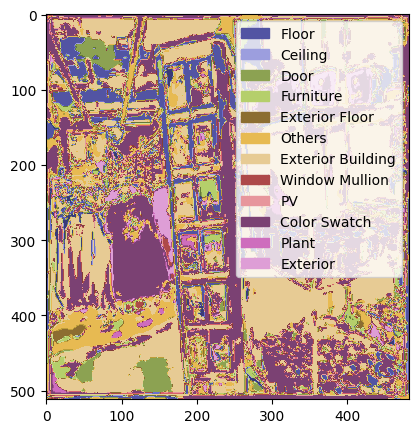

In [28]:
import matplotlib.patches as mpatches


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
im= ax.imshow(segmentation, cmap='tab20b')

values = list(range(13))
names = list(objects.keys())
colors = [ im.cmap(im.norm(value)) for value in values]
aa = [ mpatches.Patch(color=colors[i], label=f"{names[i]}") for i in range(1,13) ]
plt.legend(handles=aa)

plt.show()

In [49]:
np.unique(segmentation).shape

(541,)